# Cifar-10 이미지 분류
(Canadian Institute for Advanced Research)

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
seed = 2023
np.random.seed(seed)

- 데이터 전처리

In [2]:
from tensorflow.keras.datasets import cifar10
(X_train, y_train), (X_test, y_test) = cifar10.load_data()
X_train.shape, y_train.shape, X_test.shape, y_test.shape

170498071/170498071 [==============================] - 6s 0us/step


((50000, 32, 32, 3), (50000, 1), (10000, 32, 32, 3), (10000, 1))

In [3]:
class_names = ['airplane', 'automobile', 'bird', 'cat', 'deer',
               'dog', 'frog', 'horse', 'ship', 'truck']

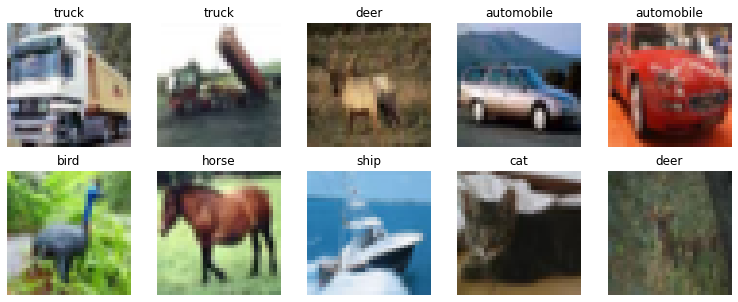

In [4]:
plt.figure(figsize=(13,5))
for i in range(1, 11):
    plt.subplot(2, 5, i)
    plt.imshow(X_train[i], cmap='Greys')
    plt.title(class_names[y_train[i,0]])
    plt.axis('off')
plt.show()

In [5]:
# X_data
X_train = X_train / 255.
X_test = X_test / 255.

In [6]:
# y_data: one-hot encoding
from tensorflow.keras.utils import to_categorical
Y_train = to_categorical(y_train)
Y_test = to_categorical(y_test)
Y_train.shape, Y_test.shape

((50000, 10), (10000, 10))

- 모델 정의/설정/학습/평가

In [7]:
from tensorflow.keras.models import Sequential, load_model
from tensorflow.keras.layers import Dense, Conv2D, Flatten, MaxPooling2D, Dropout
from tensorflow.keras.callbacks import ModelCheckpoint, EarlyStopping

In [8]:
model = Sequential([ 
    Conv2D(32, (3,3), input_shape=X_train.shape[1:], padding='same', activation='relu'),
    Conv2D(32, (3,3), activation='relu'),
    MaxPooling2D(),
    Dropout(0.25),
    Conv2D(64, (3,3), padding='same', activation='relu'),
    Conv2D(64, (3,3), activation='relu'),
    MaxPooling2D(),
    Dropout(0.25),
    Flatten(),
    Dense(512, activation='relu'),
    Dropout(0.5),
    Dense(10, activation='softmax')
])
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 32, 32, 32)        896       
                                                                 
 conv2d_1 (Conv2D)           (None, 30, 30, 32)        9248      
                                                                 
 max_pooling2d (MaxPooling2D  (None, 15, 15, 32)       0         
 )                                                               
                                                                 
 dropout (Dropout)           (None, 15, 15, 32)        0         
                                                                 
 conv2d_2 (Conv2D)           (None, 15, 15, 64)        18496     
                                                                 
 conv2d_3 (Conv2D)           (None, 13, 13, 64)        36928     
                                                        

In [9]:
model.compile('adam', 'categorical_crossentropy', ['accuracy'])

In [10]:
model_path = 'best_model.h5'
mc = ModelCheckpoint(filepath=model_path, verbose=1, save_best_only=True)
es = EarlyStopping(monitor='val_loss', patience=10)
hist = model.fit(X_train, Y_train, validation_split=0.2,
                   epochs=100, batch_size=64, 
                   callbacks=[mc, es])

Epoch 1/100
621/625 [============================>.] - ETA: 0s - loss: 1.6593 - accuracy: 0.3900
Epoch 1: val_loss improved from inf to 1.29979, saving model to best_model.h5
625/625 [==============================] - 14s 8ms/step - loss: 1.6579 - accuracy: 0.3904 - val_loss: 1.2998 - val_accuracy: 0.5346
Epoch 2/100
618/625 [============================>.] - ETA: 0s - loss: 1.2484 - accuracy: 0.5545
Epoch 2: val_loss improved from 1.29979 to 1.09869, saving model to best_model.h5
625/625 [==============================] - 5s 8ms/step - loss: 1.2480 - accuracy: 0.5548 - val_loss: 1.0987 - val_accuracy: 0.6168
Epoch 3/100
621/625 [============================>.] - ETA: 0s - loss: 1.0689 - accuracy: 0.6224
Epoch 3: val_loss improved from 1.09869 to 0.96825, saving model to best_model.h5
625/625 [==============================] - 5s 8ms/step - loss: 1.0680 - accuracy: 0.6227 - val_loss: 0.9682 - val_accuracy: 0.6579
Epoch 4/100
623/625 [============================>.] - ETA: 0s - loss: 0.

In [11]:
best_model = load_model(model_path)
best_model.evaluate(X_test, Y_test)

313/313 [==============================] - 1s 4ms/step - loss: 0.6719 - accuracy: 0.7854


[0.6719444990158081, 0.7853999733924866]

- 시각화

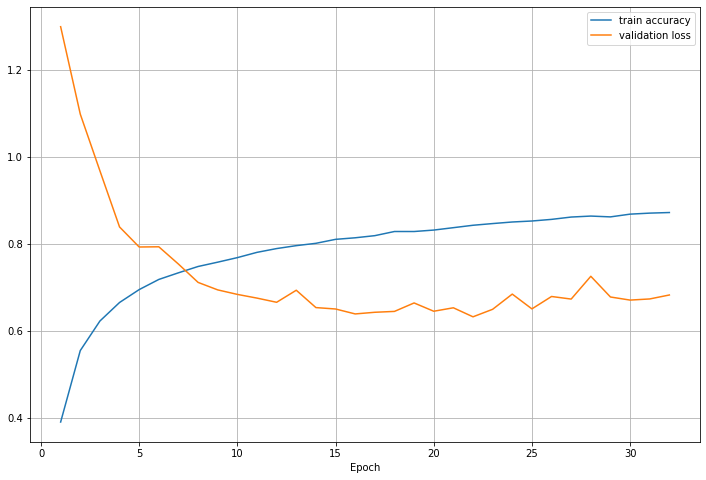

In [12]:
y_acc = hist.history['accuracy']
y_vloss = hist.history['val_loss']
xs = np.arange(1, len(y_acc)+1)
plt.figure(figsize=(12,8))
plt.plot(xs, y_acc, label='train accuracy')
plt.plot(xs, y_vloss, label='validation loss')
plt.legend(), plt.grid()
plt.xlabel('Epoch')
plt.show()